<a href="https://colab.research.google.com/github/PrajwalBawankule/Heart-Failure-Prediction/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('Heart_Disease_Dataset.csv')

In [ ]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


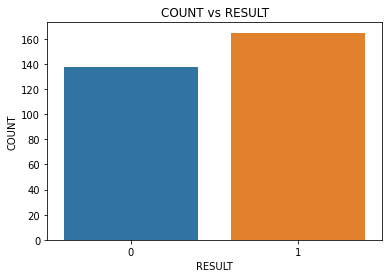

In [ ]:
sns.countplot(df['target'])
plt.title("COUNT vs RESULT")
plt.xlabel("RESULT")
plt.ylabel("COUNT")
plt.show()

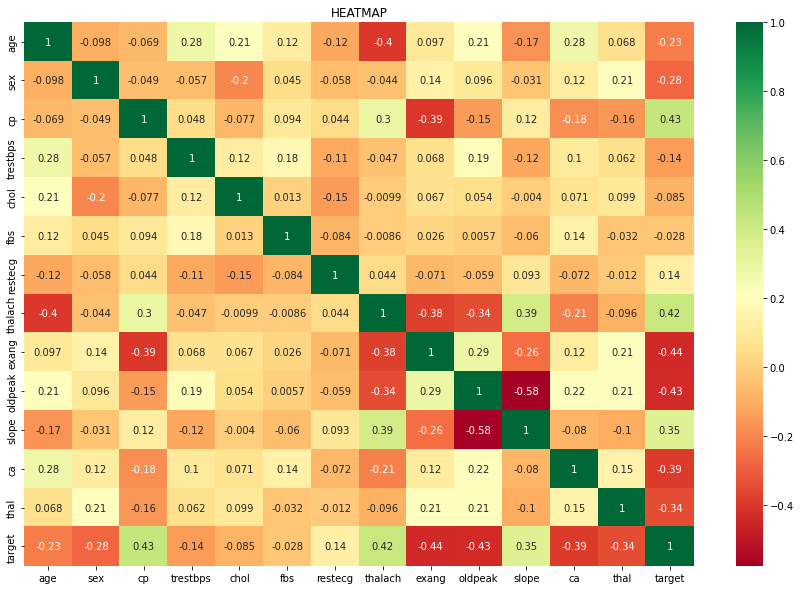

In [ ]:
cor=df.corr()
top_corr_feature=cor.index
plt.figure(figsize=(15,10))
sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plt.title("HEATMAP")
plt.show()

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [ ]:
x = df.drop(columns='target',axis=1)
y = df['target']

In [ ]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train,x_test.shape)

(303, 13)      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
238   77    1   0       125   304    0        0      162      1      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
289   55    0   0       128   205    0        2      130      1      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
100   42    1   3       148   244    0        0      178      0      0.8   
49    53    0   0       138   234    0        0      160      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
194   60    1   2       140   185    0        0      155      0      3.0   
131   49    0   1       134   271    0        1      162      0      0.0   

     slope  ca  thal  
61       2   0     3  
238      2   3     2  
160     

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
x_train_pred = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred,y_train)

In [ ]:
print("Accuracy of training data =",training_data_accuracy)

Accuracy of training data = 0.8553719008264463


In [ ]:
x_test_pred = classifier.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_pred,y_test)

In [ ]:
print("Accuracy of testing data =",testing_data_accuracy)

Accuracy of testing data = 0.819672131147541


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Metrics Table")
print(classification_report(y_test, x_test_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,x_test_pred))

Metrics Table
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix
[[21  7]
 [ 4 29]]


In [ ]:
import os
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
ws.append(["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"])
#data = input().split(",")
age = float(input("Enter age :"))
sex = float(input("Enter sex : "))
cp = float(input("Enter chest pain type : "))
trestbps = float(input("Enter rest BP : "))
chol = float(input("Enter Cholesterol : "))
fbs= float(input("Enter FBS over 120 : "))
restecg = float(input("Enter ECG Result : "))
thalach = float(input("Enter max heart rate : "))
exang = float(input("Enter exercise angina : "))
oldpeak = float(input("Enter ST Depression : "))
slope = float(input("Enter slope of ST : "))
ca = float(input("Enter number vessels fluro : "))
thal = float(input("Enter thallium : "))
#a = list(map(float, input("\nEnter the numbers : ").strip().split()))[:n]
#ws.append(data)
ws.append([age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal])
#ws.append(["Jane", 11, 12000])
wb.save("file.xlsx")
os.system("file.xlsx")

KeyboardInterrupt: ignored

In [ ]:
input = pd.read_excel('file.xlsx')
# #X_new = x_test.iloc[4]
# #print(X_new,"\n")

# # print(x_test)
# # X_new = [54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0]
prediction = classifier.predict(input)
print(prediction)

if (prediction[0]==0):
   print('The person will have heart failure')
else:
   print('The person will not have heart failure')
#print(y_test.iloc[3])


In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(classifier,open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input = pd.read_excel('file.xlsx')
# #X_new = x_test.iloc[4]
# #print(X_new,"\n")

# # print(x_test)
# # X_new = [54.0,1.0,0.0,122.0,286.0,0.0,0.0,116.0,1.0,3.2,1.0,2.0,2.0]
prediction = loaded_model.predict(input)
print(prediction)

if (prediction[0]==0):
   print('The person will have heart failure')
else:
   print('The person will not have heart failure')
#print(y_test.iloc[3])

FileNotFoundError: ignored